In [ ]:
import re
import html
import pandas as pd
import numpy as np
import warnings
import csv
warnings.filterwarnings('ignore')

In [ ]:
!pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 48.6 MB/s eta 0:00:00


In [ ]:
!pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.3 MB/s eta 0:00:00


In [ ]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 2.9 MB/s eta 0:00:00


In [ ]:
!pip install transformers[torch]

In [ ]:
from google.colab import files
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from numpy import array
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import torch
from torch.utils.data import DataLoader, RandomSampler
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from keras import regularizers
import keras
import keras.utils
from keras import utils as np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout, Embedding, Conv1D, GlobalMaxPooling1D,SpatialDropout1D,Bidirectional
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from keras.utils import to_categorical
from sklearn import neighbors
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from transformers import BertTokenizer, BertForSequenceClassification,BertForMaskedLM,AutoModel, AutoTokenizer
import pickle

In [ ]:
df_train = pd.read_csv(r"/content/drive/MyDrive/disaster_train.csv",on_bad_lines='skip')

In [ ]:
df_test = pd.read_csv(r"/content/drive/MyDrive/disaster_test.csv",on_bad_lines='skip')

In [ ]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


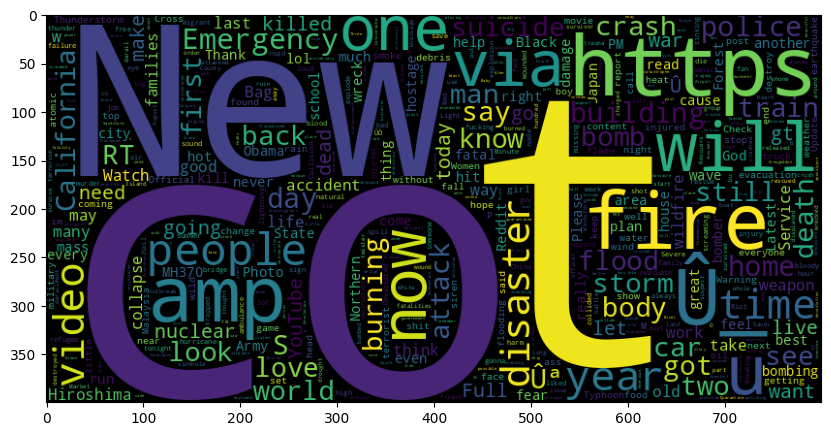

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 800 , height = 400,
               collocations=False).generate(" ".join(df_train["text"]))
plt.imshow(wc)

In [ ]:
df_train.shape

(7613, 5)

In [ ]:
df_train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
df_train.drop_duplicates(inplace=True)
# df_train.dropna(inplace=True)

In [ ]:
df_train.reset_index(inplace = True,drop=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def clean_text(text):
  text = re.sub(r'<[^>]*>', '', text)          # Removing HTML tags
  text = html.unescape(text)                   # Removing HTML escape characters
  text = text.lower().replace('\n',' ').replace('\r','').strip()
  text = re.sub(r'[^\w\s]', '', text)          # Removing non-alphanumeric characters
  text = re.sub(r'\s+', ' ', text).strip()     # Removing spaces
  stop_words = set(stopwords.words('english'))

  lemmatizer = WordNetLemmatizer()
  text = lemmatizer.lemmatize(text)
  word_tokens = word_tokenize(text)

  filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words]
  text = " ".join(filtered_sentence)

  return text

In [ ]:
df_train['cleaned_tweets'] = df_train['text'].apply(lambda text: clean_text(text))

In [ ]:
df_train.head()

,id,keyword,location,text,target,cleaned_tweets
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [ ]:
def tf_idf(df,col,max_features):
  corpus = df[''+col+'']
  vectorizer = TfidfVectorizer(max_features = max_features)
  X = vectorizer.fit_transform(corpus).toarray()
  return X

In [ ]:
def train_test(y,train_set,test_size):
  X_train, X_test, y_train, y_test = train_test_split(train_set, y, test_size = test_size, random_state = 0)
  return X_train, X_test, y_train, y_test

Tfidf:

In [ ]:
X = tf_idf(df_train,'cleaned_tweets',20000)

In [ ]:
y = np.array(df_train.drop(['id','keyword','location','text','cleaned_tweets'],axis=1))

In [ ]:
X_train, X_test, y_train, y_test = train_test(y,X,0.2)

In [ ]:
def predict_lr():
  classifier = LogisticRegression(random_state=0).fit(X_train, y_train)
  return classifier

In [ ]:
def decision_tree():
  model = DecisionTreeClassifier()
  model.fit(X_train, y_train)
  return model

In [ ]:
def evaluate_performance_short(df,pred_func):
  model = pred_func()
  results_df = pd.DataFrame()
  results_df['target'] = df[len(df)-len(y_test):len(df)]['target']
  results_df['Predicted_intent'] = model.predict(X_test)
  print(classification_report(results_df['Predicted_intent'],results_df['target']))

In [ ]:
evaluate_performance_short(df_train,predict_lr)

              precision    recall  f1-score   support

           0       0.71      0.54      0.61      1060
           1       0.32      0.49      0.38       463

    accuracy                           0.53      1523
   macro avg       0.51      0.51      0.50      1523
weighted avg       0.59      0.53      0.54      1523



In [ ]:
evaluate_performance_short(df_train,decision_tree)

              precision    recall  f1-score   support

           0       0.62      0.53      0.57       944
           1       0.38      0.46      0.42       579

    accuracy                           0.51      1523
   macro avg       0.50      0.50      0.49      1523
weighted avg       0.53      0.51      0.51      1523



In [ ]:
def cnn(optimizer):
  X = df_train['cleaned_tweets'].values
  Y = df_train['target'].values
  max_len = len(df_train['cleaned_tweets'].max())
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Check random_state

  tokenizer = Tokenizer(num_words=1000)
  tokenizer.fit_on_texts(X_train)                 # Creates a vocabulary based on X_train
  X_train = tokenizer.texts_to_sequences(X_train)
  X_test = tokenizer.texts_to_sequences(X_test)
  X_train = pad_sequences(X_train, maxlen=max_len)
  X_test = pad_sequences(X_test, maxlen=max_len)

  model = Sequential()
  model.add(Embedding(1000, 50, input_length=max_len))  # 1000 tells us the vocabulary size
  # 50 the number of dimensions in which to represent each word.
  model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))                     # Substitiutes random parts of the data with 0s to prevent overfitting
  model.add(Dense(2, activation='softmax'))   # O/p layer, with 2 o/p neurons for 2 categories.

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.fit(X_train,tf.keras.utils.to_categorical(y_train), validation_split=0.1, epochs=5, batch_size=32)

  y_pred = model.predict(X_test)
  classes_x = np.argmax(y_pred,axis=1)
  print(classification_report(y_test, classes_x))
  return model

In [ ]:
model1 = cnn('adam')

Epoch 1/5
172/172 [==============================] - 3s 10ms/step - loss: 0.5869 - accuracy: 0.6886 - val_loss: 0.4609 - val_accuracy: 0.7964
Epoch 2/5
172/172 [==============================] - 1s 6ms/step - loss: 0.4037 - accuracy: 0.8232 - val_loss: 0.4337 - val_accuracy: 0.8095
Epoch 3/5
172/172 [==============================] - 1s 7ms/step - loss: 0.3193 - accuracy: 0.8712 - val_loss: 0.4459 - val_accuracy: 0.8062
Epoch 4/5
172/172 [==============================] - 1s 7ms/step - loss: 0.2495 - accuracy: 0.9077 - val_loss: 0.4768 - val_accuracy: 0.7882
Epoch 5/5
48/48 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       874
           1       0.77      0.66      0.71       649

    accuracy                           0.77      1523
   macro avg       0.77      0.76      0.76      1523
weighted avg       0.77      0.77      0.77      1523



In [ ]:
model2 = cnn('SGD')

Epoch 1/5
172/172 [==============================] - 3s 12ms/step - loss: 0.6862 - accuracy: 0.5616 - val_loss: 0.6826 - val_accuracy: 0.5698
Epoch 2/5
172/172 [==============================] - 2s 10ms/step - loss: 0.6826 - accuracy: 0.5694 - val_loss: 0.6815 - val_accuracy: 0.5698
Epoch 3/5
172/172 [==============================] - 2s 9ms/step - loss: 0.6818 - accuracy: 0.5694 - val_loss: 0.6808 - val_accuracy: 0.5698
Epoch 4/5
172/172 [==============================] - 1s 6ms/step - loss: 0.6817 - accuracy: 0.5694 - val_loss: 0.6803 - val_accuracy: 0.5698
Epoch 5/5
48/48 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523



In [ ]:
model3 = cnn('AdaGrad')

Epoch 1/5
172/172 [==============================] - 2s 7ms/step - loss: 0.6896 - accuracy: 0.5623 - val_loss: 0.6878 - val_accuracy: 0.5698
Epoch 2/5
172/172 [==============================] - 1s 6ms/step - loss: 0.6868 - accuracy: 0.5694 - val_loss: 0.6859 - val_accuracy: 0.5698
Epoch 3/5
172/172 [==============================] - 1s 6ms/step - loss: 0.6855 - accuracy: 0.5694 - val_loss: 0.6848 - val_accuracy: 0.5698
Epoch 4/5
172/172 [==============================] - 1s 8ms/step - loss: 0.6844 - accuracy: 0.5694 - val_loss: 0.6841 - val_accuracy: 0.5698
Epoch 5/5
48/48 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       874
           1       0.00      0.00      0.00       649

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.42      1523



In [ ]:
model4 = cnn('RMSprop')

Epoch 1/5
172/172 [==============================] - 3s 13ms/step - loss: 0.5862 - accuracy: 0.6878 - val_loss: 0.4468 - val_accuracy: 0.7964
Epoch 2/5
172/172 [==============================] - 2s 10ms/step - loss: 0.4156 - accuracy: 0.8166 - val_loss: 0.4401 - val_accuracy: 0.7931
Epoch 3/5
172/172 [==============================] - 2s 10ms/step - loss: 0.3661 - accuracy: 0.8425 - val_loss: 0.4390 - val_accuracy: 0.8030
Epoch 4/5
172/172 [==============================] - 2s 10ms/step - loss: 0.3249 - accuracy: 0.8613 - val_loss: 0.4393 - val_accuracy: 0.8062
Epoch 5/5
48/48 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       874
           1       0.77      0.71      0.74       649

    accuracy                           0.78      1523
   macro avg       0.78      0.77      0.78      1523
weighted avg       0.78      0.78      0.78      1523



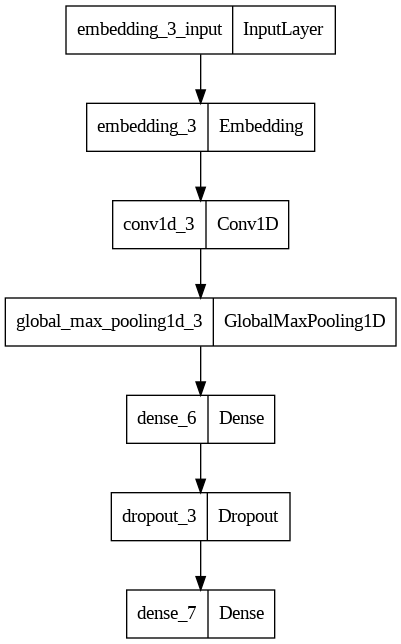

In [ ]:
tf.keras.utils.plot_model(
    model4,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

Hyperparameter tuning for CNN:

In [ ]:
X = df_train['cleaned_tweets'].values
Y = df_train['target'].values
max_len = len(df_train['cleaned_tweets'].max())
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Check random_state

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)                 # Creates a vocabulary based on X_train
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.5/127.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 9.6 MB/s eta 0:00:00


In [ ]:
def build_model(hp):
  max_len = len(df_train['cleaned_tweets'].max())
  model = keras.Sequential([
    keras.layers.Embedding(10000, 5000, input_length=max_len),
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=128, max_value=256, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        padding='same',
        activation='relu'
    ),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=128, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.Dropout(hp.Float('dropout', 0, 0.9, step=0.3, default=0.5)),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=keras.optimizers.RMSprop(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
!pip install keras-tuner

In [ ]:
from kerastuner import RandomSearch
import keras_tuner

Using TensorFlow backend


In [ ]:
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,directory='output',project_name="Disaster_tweets")

In [ ]:
tuner.search(X_train,y_train,epochs=5,validation_split=0.1)

Trial 5 Complete [00h 00m 31s]
val_accuracy: 0.8193760514259338

Best val_accuracy So Far: 0.8193760514259338
Total elapsed time: 00h 05m 25s


In [ ]:
tuner.results_summary()

Results summary
Results in output/Disaster_tweets
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 4 summary
Hyperparameters:
conv_1_filter: 160
conv_1_kernel: 3
dense_1_units: 208
dropout: 0.6
learning_rate: 0.001
Score: 0.8193760514259338

Trial 0 summary
Hyperparameters:
conv_1_filter: 240
conv_1_kernel: 5
dense_1_units: 160
dropout: 0.3
learning_rate: 0.001
Score: 0.8111658692359924

Trial 1 summary
Hyperparameters:
conv_1_filter: 224
conv_1_kernel: 5
dense_1_units: 128
dropout: 0.8999999999999999
learning_rate: 0.001
Score: 0.807881772518158

Trial 3 summary
Hyperparameters:
conv_1_filter: 160
conv_1_kernel: 3
dense_1_units: 208
dropout: 0.0
learning_rate: 0.01
Score: 0.7881773114204407

Trial 2 summary
Hyperparameters:
conv_1_filter: 192
conv_1_kernel: 3
dense_1_units: 160
dropout: 0.8999999999999999
learning_rate: 0.01
Score: 0.7668308615684509


In [ ]:
cnn_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 5000)          50000000  
                                                                 
 conv1d (Conv1D)             (None, 45, 160)           2400160   
                                                                 
 global_max_pooling1d (Glob  (None, 160)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 208)               33488     
                                                                 
 dropout (Dropout)           (None, 208)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 209       
                                                        

In [ ]:
# cnn_model.fit(X_train,y_train, epochs=25, validation_split=0.1, initial_epoch=5)

In [ ]:
y_probs = cnn_model.predict(X_test)

48/48 [==============================] - 0s 8ms/step


In [ ]:
def get_preds(y_probs,threshold):
  y_pred_test = np.empty_like(y_probs)
  y_pred_test[:] = (y_probs[:] > threshold) * 1
  return y_pred_test

In [ ]:
y_pred = get_preds(y_probs,0.5)

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.85      0.78      0.82       946
         1.0       0.69      0.77      0.73       577

    accuracy                           0.78      1523
   macro avg       0.77      0.78      0.77      1523
weighted avg       0.79      0.78      0.78      1523



BERT embeddings:

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def get_bert_embeds(df,col):
  X1 = df[''+col+''].tolist()
  word_tokens = tokenizer(X1, padding=True, truncation=True)
  ids = torch.tensor(word_tokens['input_ids'])
  word_embeddings = model.bert.embeddings.word_embeddings(ids)
  return word_embeddings

In [ ]:
X_bert = get_bert_embeds(df_train,'cleaned_tweets')

In [ ]:
X_bert.shape

torch.Size([7613, 52, 768])

In [ ]:
y = np.array(df_train.drop(['id','keyword','location','text','cleaned_tweets'],axis=1))

In [ ]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test(y,X_bert,0.2)

In [ ]:
def bert_cnn(optimizer,X_train,X_test,y_train,y_test):
  max_len = len(df_train['cleaned_tweets'].max())
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))                     # Substitiutes random parts of the data with 0s to prevent overfitting
  model.add(Dense(2, activation='softmax'))   # O/p layer, with 2 o/p neurons for 2 categories.

  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  model.fit(X_train,tf.keras.utils.to_categorical(y_train), validation_split=0.1, epochs=10, batch_size=32)

  y_pred = model.predict(X_test)
  classes_x = np.argmax(y_pred,axis=1)
  print(classification_report(y_test, classes_x))
  return model

In [ ]:
bert_cnn1 = bert_cnn('RMSprop',X_train_bert.detach().numpy(), X_test_bert.detach().numpy(), y_train_bert, y_test_bert)

Epoch 1/10
172/172 [==============================] - 3s 10ms/step - loss: 0.6431 - accuracy: 0.6302 - val_loss: 0.5747 - val_accuracy: 0.7307
Epoch 2/10
172/172 [==============================] - 1s 8ms/step - loss: 0.4938 - accuracy: 0.7712 - val_loss: 0.5183 - val_accuracy: 0.7241
Epoch 3/10
172/172 [==============================] - 2s 11ms/step - loss: 0.4086 - accuracy: 0.8205 - val_loss: 0.4817 - val_accuracy: 0.7898
Epoch 4/10
172/172 [==============================] - 2s 10ms/step - loss: 0.3491 - accuracy: 0.8533 - val_loss: 0.5113 - val_accuracy: 0.7931
Epoch 5/10
172/172 [==============================] - 2s 10ms/step - loss: 0.3080 - accuracy: 0.8747 - val_loss: 0.5472 - val_accuracy: 0.7833
Epoch 6/10
172/172 [==============================] - 2s 9ms/step - loss: 0.2607 - accuracy: 0.8947 - val_loss: 0.6235 - val_accuracy: 0.7800
Epoch 7/10
172/172 [==============================] - 1s 8ms/step - loss: 0.2084 - accuracy: 0.9181 - val_loss: 0.7628 - val_accuracy: 0.7652
Ep

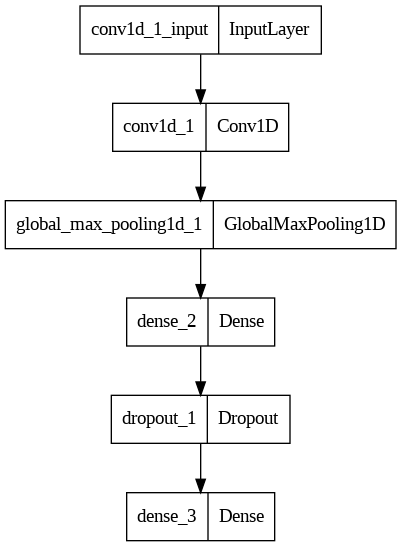

In [ ]:
tf.keras.utils.plot_model(
    bert_cnn1,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=False,
    show_trainable=False,
)

Hyperparameter tuning for BERT-CNN:

In [ ]:
X_bert = get_bert_embeds(df_train,'cleaned_tweets')

In [ ]:
y = np.array(df_train.drop(['id','keyword','location','text','cleaned_tweets'],axis=1))

In [ ]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test(y,X_bert,0.2)

In [ ]:
def build_model2(hp):
  max_len = len(df_train['cleaned_tweets'].max())
  model = keras.Sequential([
    keras.layers.Conv1D(
        filters=hp.Int('conv_1_filter', min_value=128, max_value=256, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        padding='same',
        activation='relu',
        input_shape = X_train_bert.detach().numpy().shape[1:]
    ),
    keras.layers.GlobalMaxPooling1D(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=128, max_value=256, step=16),
        activation='relu'
    ),
    keras.layers.Dropout(hp.Float('dropout', 0, 0.9, step=0.3, default=0.5)),
    keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=keras.optimizers.RMSprop(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

  return model

In [ ]:
tuner = RandomSearch(build_model2,
                     objective='val_accuracy',
                     max_trials=5,directory='output',project_name="Disaster_tweets2")

In [ ]:
tuner.search(X_train_bert.detach().numpy(),y_train_bert,epochs=5,validation_split=0.1)

Trial 5 Complete [00h 00m 14s]
val_accuracy: 0.7947455048561096

Best val_accuracy So Far: 0.7947455048561096
Total elapsed time: 00h 01m 06s


In [ ]:
tuner.results_summary()

Results summary
Results in output/Disaster_tweets2
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
conv_1_filter: 192
conv_1_kernel: 3
dense_1_units: 208
dropout: 0.0
learning_rate: 0.001
Score: 0.7947455048561096

Trial 4 summary
Hyperparameters:
conv_1_filter: 256
conv_1_kernel: 5
dense_1_units: 176
dropout: 0.3
learning_rate: 0.001
Score: 0.7947455048561096

Trial 2 summary
Hyperparameters:
conv_1_filter: 192
conv_1_kernel: 5
dense_1_units: 256
dropout: 0.3
learning_rate: 0.01
Score: 0.7898193597793579

Trial 3 summary
Hyperparameters:
conv_1_filter: 224
conv_1_kernel: 3
dense_1_units: 192
dropout: 0.3
learning_rate: 0.01
Score: 0.7898193597793579

Trial 1 summary
Hyperparameters:
conv_1_filter: 208
conv_1_kernel: 5
dense_1_units: 176
dropout: 0.8999999999999999
learning_rate: 0.001
Score: 0.7701149582862854


In [ ]:
bert_cnn_model = tuner.get_best_models(num_models=1)[0]

In [ ]:
bert_cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 52, 192)           442560    
                                                                 
 global_max_pooling1d (Glob  (None, 192)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 208)               40144     
                                                                 
 dropout (Dropout)           (None, 208)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 209       
                                                                 
Total params: 482913 (1.84 MB)
Trainable params: 482913 (1.84 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [ ]:
y_probs = bert_cnn_model.predict(X_test_bert.detach().numpy())

48/48 [==============================] - 0s 5ms/step


In [ ]:
def get_preds(y_probs,threshold):
  y_pred_test = np.empty_like(y_probs)
  y_pred_test[:] = (y_probs[:] > threshold) * 1
  return y_pred_test

In [ ]:
y_pred = get_preds(y_probs,0.5)

In [ ]:
print(classification_report(y_pred,y_test_bert))

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      1050
         1.0       0.65      0.88      0.75       473

    accuracy                           0.82      1523
   macro avg       0.80      0.84      0.80      1523
weighted avg       0.85      0.82      0.82      1523



In [ ]:
dt_model = decision_tree()
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

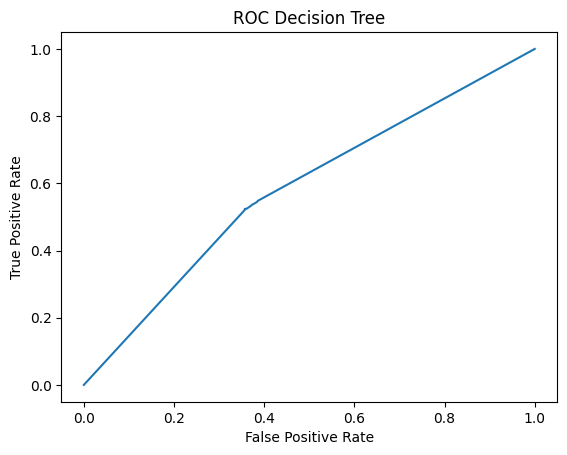

In [ ]:
plt.plot(fpr,tpr)
plt.title("ROC Decision Tree")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def bert_cnn(X_train,X_test,y_train,y_test):
  max_len = len(df_train['cleaned_tweets'].max())
  model = Sequential()
  model.add(Conv1D(filters=240, kernel_size=5, padding='same', activation='relu',input_shape = X_train.shape[1:]))
  model.add(GlobalMaxPooling1D())
  model.add(Dense(192, activation='relu'))
  model.add(Dropout(0.6))                     # Substitiutes random parts of the data with 0s to prevent overfitting
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='BinaryCrossentropy', optimizer=keras.optimizers.RMSprop(learning_rate = 0.001), metrics=['accuracy'])
  model.fit(X_train,tf.keras.utils.to_categorical(y_train), validation_split=0.1, epochs=10, batch_size=32)

  y_pred = model.predict(X_test)
  classes_x = np.argmax(y_pred,axis=1)
  print(classification_report(y_test, classes_x))
  return model

In [ ]:
bert_cnn1 = bert_cnn(X_train_bert.detach().numpy(), X_test_bert.detach().numpy(), y_train_bert, y_test_bert)

Epoch 1/10
172/172 [==============================] - 35s 190ms/step - loss: 0.6470 - accuracy: 0.6357 - val_loss: 0.6994 - val_accuracy: 0.6026
Epoch 2/10
172/172 [==============================] - 30s 173ms/step - loss: 0.5213 - accuracy: 0.7533 - val_loss: 0.6466 - val_accuracy: 0.7094
Epoch 3/10
172/172 [==============================] - 29s 171ms/step - loss: 0.4253 - accuracy: 0.8119 - val_loss: 0.5596 - val_accuracy: 0.6995
Epoch 4/10
172/172 [==============================] - 30s 172ms/step - loss: 0.3525 - accuracy: 0.8506 - val_loss: 0.5001 - val_accuracy: 0.7865
Epoch 5/10
172/172 [==============================] - 27s 154ms/step - loss: 0.3009 - accuracy: 0.8814 - val_loss: 0.5131 - val_accuracy: 0.7750
Epoch 6/10
172/172 [==============================] - 29s 170ms/step - loss: 0.2538 - accuracy: 0.8997 - val_loss: 0.5465 - val_accuracy: 0.7668
Epoch 7/10
172/172 [==============================] - 31s 181ms/step - loss: 0.2052 - accuracy: 0.9215 - val_loss: 0.5770 - val_ac

In [ ]:
plot_acc_data = pd.DataFrame([53,51,78,82],index = ["Logistic Regression","Decision Tree","CNN","BERT-CNN"])

Text(0, 0.5, 'Accuracy')

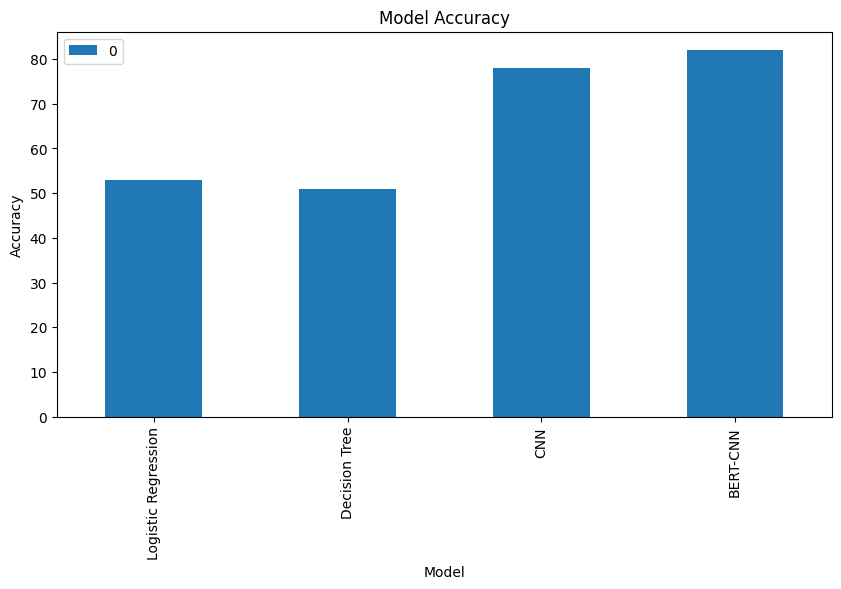

In [ ]:
plot_acc_data.plot(kind="bar",figsize=(10, 5))
plt.title("Model Accuracy")
plt.xlabel("Model")
plt.ylabel("Accuracy")

In [ ]:
plot_opt_acc_data = pd.DataFrame([77,57,57,78],index = ["Adam","SGD","AdaGrad","RMSprop"])

Text(0, 0.5, 'Accuracy')

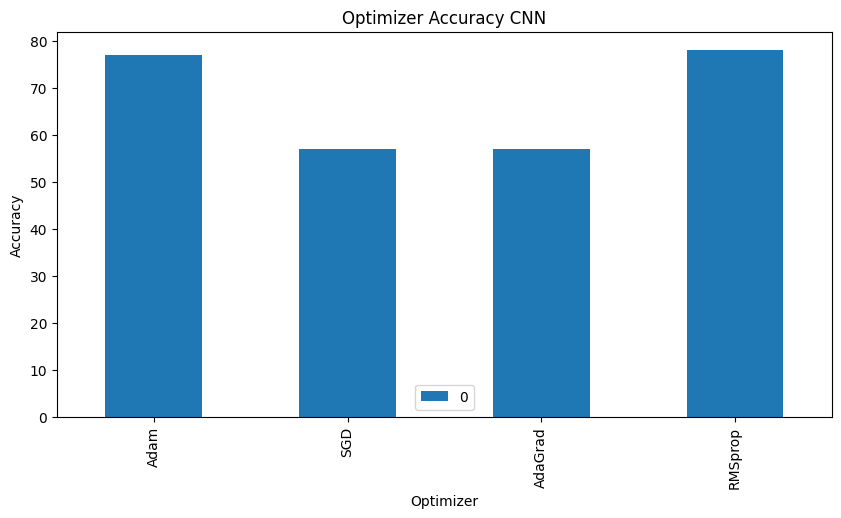

In [ ]:
plot_opt_acc_data.plot(kind="bar",figsize=(10, 5))
plt.title("Optimizer Accuracy CNN")
plt.xlabel("Optimizer")
plt.ylabel("Accuracy")

In [ ]:
lr_model = predict_lr()
y_pred_proba = lr_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

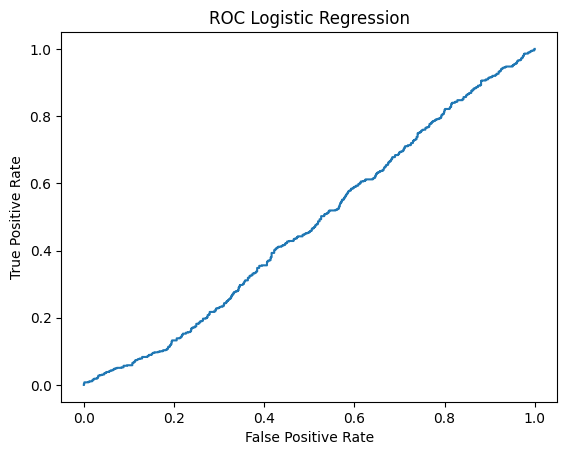

In [ ]:
plt.plot(fpr,tpr)
plt.title("ROC Logistic Regression")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
dt_model = decision_tree()
y_pred_proba = dt_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

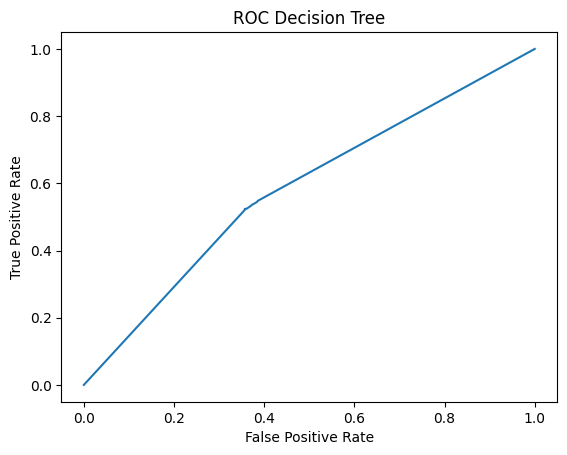

In [ ]:
plt.plot(fpr,tpr)
plt.title("ROC Decision Tree")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
y_pred_preds = bert_cnn_model.predict(X_test_bert.detach().numpy())
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_preds)

48/48 [==============================] - 0s 7ms/step


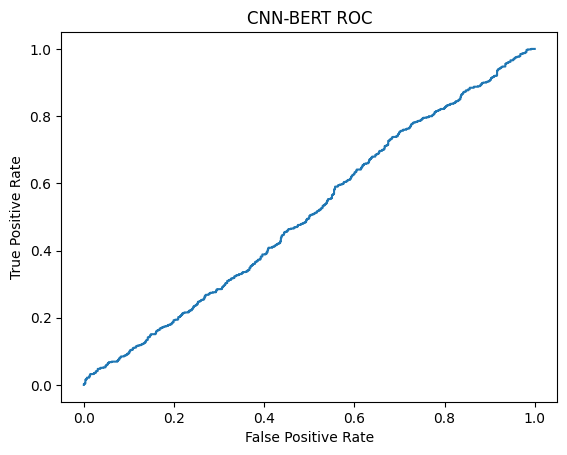

In [ ]:
plt.plot(fpr,tpr)
plt.title("CNN-BERT ROC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Inference:

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.bias', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def clean_text(text):
  text = re.sub(r'<[^>]*>', '', text)          # Removing HTML tags
  text = html.unescape(text)                   # Removing HTML escape characters
  text = text.lower().replace('\n',' ').replace('\r','').strip()
  text = re.sub(r'[^\w\s]', '', text)          # Removing non-alphanumeric characters
  text = re.sub(r'\s+', ' ', text).strip()     # Removing spaces
  stop_words = set(stopwords.words('english'))

  lemmatizer = WordNetLemmatizer()
  text = lemmatizer.lemmatize(text)
  word_tokens = word_tokenize(text)

  filtered_sentence = [lemmatizer.lemmatize(w) for w in word_tokens if w not in stop_words]
  text = " ".join(filtered_sentence)

  return text

In [ ]:
def get_inference_bert(tweet,pretrained_bert,model):
  cleaned_tweet = clean_text(tweet)
  tweet_tokens = tokenizer([cleaned_tweet], padding=True, truncation=True)
  ids = torch.tensor(tweet_tokens['input_ids'])
  tweet_embedding = pretrained_bert.bert.embeddings.word_embeddings(ids)
  tweet_embedding_fin = torch.zeros(1, 52, 768)
  tweet_embedding_fin[:, :11, :] = tweet_embedding
  print(tweet_embedding_fin.shape)
  y_pred = model.predict(tweet_embedding_fin.detach().numpy())
  classes_x = np.argmax(y_pred,axis=1)
  if classes_x == 1:
    print("Disaster")
  else:
    print("Not a disaster")

In [ ]:
df_train.shape

(7613, 6)

In [ ]:
tweet1 = df_train["text"][1]

In [ ]:
get_inference_bert(tweet1,model,model_cnn)

torch.Size([1, 52, 768])
1/1 [==============================] - 0s 33ms/step
Disaster
